# Notebook Final
---
Shopee Code League Week 2 : Product Detection<br>
Deep Learning using Keras with Tersorflow backend<br>
`Note : kenapa namanya final? karena gw dah males ngedit lagi awkwkwk`


# Cek GPU Colab
Coba cek dlu GPU colabnya pke kode berikut. Kalau gak ada coba dinyalain dlu caranya:<br>
`Edit -> Notebook Settings -> Hardware accelerator -> GPU`<br>
Note: Karena make GPU gak tau kenapa Disknya bakal kepake secara drastis. Jadi mungkin gk bsa run 2 notebook di akun google yang sama.


In [1]:
!nvidia-smi

Sun Jun 28 03:12:04 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Import Libraries
Import dlu gan :)

In [10]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import shutil
import string
import random
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.resnet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
from zipfile import ZipFile
from keras.applications import *

# Load Data ke Session
Load datanya dlu gan ke session colab.<br>
URL nya bsa pke yang otomatis. itu URL file aing jangan dipake sering sering yak sehari nanti kena limit, aing mau make juga. wkwk<br>
<ul>
  <li>
  <h2>Pake File sendiri dari Drive</h2>

```
Klik kanan di file drive kalian -> Dapatkan Link yang bsa dibagikan -> ganti jadi siapa saja yang memiliki link -> Salin Link -> Selsai
```

  Nanti klean dapet kek gni contoh:<br>
  
```
https://drive.google.com/file/d/1qGQ6YqSzLGGa0rk3FZJ5cxdwE9Uom1yg/view?usp=sharing
```

  <br>
  Tinggal ganti format linknya jadi:<br>

```
https://drive.google.com/uc?id=1qGQ6YqSzLGGa0rk3FZJ5cxdwE9Uom1yg
```

  Terus kalian bsa langsung pakai di fungsi.<br>
```
base_dir = Load_File(https://drive.google.com/uc?id=1qGQ6YqSzLGGa0rk3FZJ5cxdwE9Uom1yg)
```
  Note : Jangan lupa buat ngeganti direktori local zip jd nama file agan"
```
local_zip = '/content/DimasBauBawank.zip'
```
  <li><h2>Pakai cara yang kemarin</h2>
  Pakai cara itu juga gapapa, step ini di skip aja.
</ul?

In [ ]:
def Load_File(url = 'https://drive.google.com/uc?id=19AR9GVUepxoi771KTLmUCf9Y-LJFpes6'):
  !gdown {url}
  local_zip = '/content/Salinan shopee-product-detection-dataset.zip'
  zip_ref = ZipFile(local_zip, mode = 'r', allowZip64 = True)
  zip_ref.extractall('/tmp')
  zip_ref.close()
  return '/tmp/train/train'

In [2]:
base_dir = Load_File()

Downloading...
From: https://drive.google.com/uc?id=1qGQ6YqSzLGGa0rk3FZJ5cxdwE9Uom1yg
To: /content/Salinan shopee-product-detection-dataset.zip
10.1GB [02:27, 68.4MB/s]


# Handling Imbalance Data
Klo dari aing solusinya resample class yang kekurangan data pke data augmentation
<ul>
  <li><h2>Kelebihan</h2>
    <ol>
      <li>Kagak kehilangan data
      <li>Tambahan data
      <li>Udah ngelakuin Augmentation data pdhal datanya besar
      <li>Data Seimbang antar kelasnya
    </ol>
  <li><h2>Kekurangan</h2>
    <ol>
      <li>Gak semua Data dilakukan Augmentation
      <li>Dan masih banyak lagi
    </ol>
</ul>


In [18]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def randomString(stringLength=4): #Random tring Generator buat ngerandom nama file yang udah di Augmentasi
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(stringLength))

def Balance_Size(direc):
  aug = ImageDataGenerator(rotation_range=30, # Augmentasi data Image
                          zoom_range=0.15,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.15,
                          horizontal_flip=True,
                          fill_mode="nearest")

  render = lambda direc : np.expand_dims(img_to_array(load_img(direc, target_size=(224,224))), axis=0) # Render

  def imageGen(image, target): # Run Augmentation
    temp = aug.flow(image, batch_size=1, save_to_dir=target, save_prefix=f"aug_{randomString()}", save_format="jpg")
    for test in temp:
      wawa = 1 + 1
      break

  list_dir = os.listdir(direc)
  max_ = max([len(os.listdir(direc + f'/{x}')) for x in list_dir])
  for folder in list_dir:                 # Checking data per folder
    temp = direc + f'/{folder}'
    list_item = os.listdir(temp)
    i, j = divmod(max_, len(list_item))
    i -= 1
    if i != 0:
      for item in list_item:              # Let Flow Let Flow
        temp_2 = temp + f'/{item}'
        image = render(temp_2)
        for k in range(i):
          target = temp + f'/{k}_{item}'
          imageGen(image, target=temp)
    if j != 0:
      for _ in range(j):
        rand = random.choice(list_item)
        item = temp + f'/{rand}'
        target = temp + f'/j_{rand}'
        image = render(item)
        imageGen(image, target=temp)
        list_item.remove(rand) 

In [19]:
Balance_Size(base_dir) # Running Balance Size Func

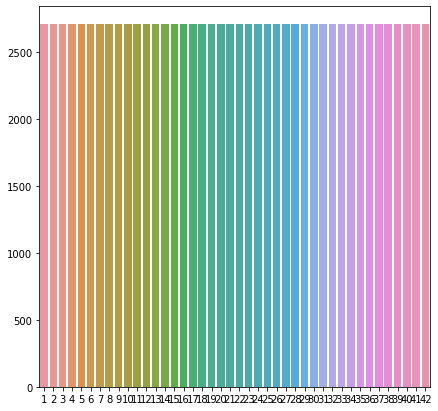

In [30]:
# Checking Jumlah data per kelas
list_dir = os.listdir(base_dir)
plt.figure(figsize=(7,7))
sns.barplot(list(range(1,43)), [len(os.listdir(base_dir + f'/{x}')) for x in list_dir])
plt.show()

# Modelling
Generate model gan. Agan bsa customize modelnya sendiri di dalem class berikut.<br>
Transfer Learningnya juga bsa terserah agan tinggal ganti aja.<br>
Keras Tansfer Learning : <a href="https://keras.io/api/applications/">Sedot</a>
<br>
<br>
Note : Jangan lupa buat ngeganti 

```
from keras.applications.resnet import preprocess_input
```
Resnetnya diganti jadi Transfer Learning yang agan mau coba


In [ ]:
class Modelling(object):
  def __init__(self, tf = ResNet50(weights='imagenet',include_top=False)):
    x=tf.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(1024,activation='relu')(x)
    x=Dense(512,activation='relu')(x)
    preds=Dense(42,activation='softmax')(x)
    x=Dropout(0.2)(x)
    model = Model(inputs=tf.input,outputs=preds)
    for layer in model.layers[:20]:
        layer.trainable=False
    for layer in model.layers[20:]:
        layer.trainable=True
    self.model = model

  def Load_Saved(self, direc): # Load Model
    self.model = load_model(direc)
    return self.model

In [ ]:
# Base Model
base_model = Modelling()

In [ ]:
# New Model
model = base_model.model
# Load Existing Model
# model = base_model.Load_Saved(#DIREKTORI#)

# Load Data
Load datanya gan

In [ ]:
train_datagen=ImageDataGenerator(validation_split=0.25,
                                 preprocessing_function=preprocess_input)

train_generator=train_datagen.flow_from_directory(base_dir,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training',
                                                 shuffle=True)
valid_generator=train_datagen.flow_from_directory(base_dir,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='validation',
                                                 shuffle=True)

# Compile Model
Optimizernya bebas gan bisa di cek linknya:<br>
Keras Optimize : <a href="https://keras.io/api/optimizers/">Sedot</a>

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# CheckPoint
Save model per Epoch


In [ ]:
filepath="ResNet_1-Adam-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = [ModelCheckpoint(filepath, monitor='val_accuracy', 
                              save_best_only=True, mode='max')]

# Fit Model
Fit Modelnya skarang gan :)<br>
Note : Epochnya bebas tergantung keteguhan hati menunggu wkwk

In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
valid_size_train=valid_generator.n//valid_generator.batch_size
model.fit(train_generator,
            validation_data=valid_generator,
            steps_per_epoch=step_size_train,
            callbacks=checkpoint,
            epochs = 10,
            validation_steps = valid_size_train)

# Predictions
Akhirnya modelnya dah siap gan tinggal prediksi aja :v

In [ ]:
data = pd.read_csv('/tmp/train.csv')
data.head()

In [ ]:
filename = data['filename'].tolist()
image_size=(224,224)
test_dir = '/tmp/test/test/'
res = []
for direc in filename:
  img = load_img(test_dir+direc, target_size=image_size)
  img_array = preprocess_input(np.expand_dims(img_to_array(img), axis=0))
  res.append(np.argmax(model.predict(img_array)))

In [ ]:
res = list(map(lambda x : str(x).zfill(2), res))
data['category'] = res

<h2>Lihat Sebaran Data Prediksiannya gan</h2>

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'category', data = data)
plt.title('Figure Size')
plt.show()

In [ ]:
# Save to CSV
data.to_csv('submission.csv', index=False)